# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [3]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
titanic_df = pd.read_csv('./train.csv')

## 1. 분석의 목적과 변수 확인

In [12]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cabin column에 결측치가 존재

In [13]:
## 각 Columns의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [14]:
##데이터의 전체 정보를 얻는 함수 : .descibe()

titanic_df.describe() #수치형 데이터에 대한 요약 정보만 제공!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- passenserId는 큰 의미X
- survived는 큰 의미X
- Age는 평균 30세 정도
- SibSp는 max의 값은 8로 대가족이 탑승한 것을 확인
- Fare은 max와 min의 차이가 큰 것으로 탑승요금의 편차가 매우 크다는 것을 확인

In [16]:
##상관계수 확인!

titanic_df.corr()
#Correlation is NOT Causation

#상관성 A up, B up
#인과성 A up -> B us

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- 대부분의 상관계수가 높다고 볼 수 없다
- Pclass와 Survived가 음의 상관계수를 가짐
- SibSp와 Parch가 양의 상관계수를 가짐
- Fare과 Pclass가 음의 상관관계를 가짐

In [23]:
##결측치 확인

titanic_df.isnull().sum()
#Age, Cabin, Embarked에 결측치를 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived

In [31]:
# 생존자, 사망자 명수확인

#titanic_df['Survived'].sum()
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

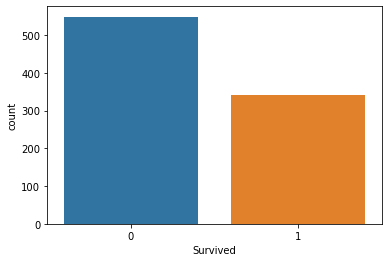

In [36]:
# 생존자와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x= 'Survived' , data= titanic_df)
plt.show()

### II. Pclass

In [40]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [42]:
# 생존자 인원?

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [47]:
#전체 인원대비 생존자의 비율

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


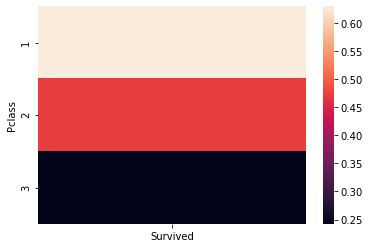

In [49]:
sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [53]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

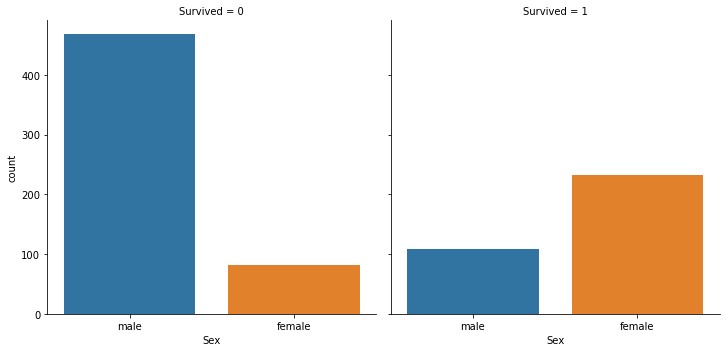

In [56]:
# sns.catplot()

sns.catplot(x='Sex',col ='Survived', kind = 'count',data=titanic_df)
plt.show()

### IV. Age

Remind 결측치존재!

In [58]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

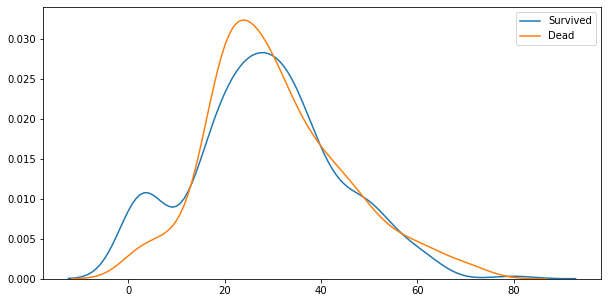

In [78]:
# Survived 1,0과 Age의 경향성

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(titanic_df[titanic_df.Survived==1]['Age'],ax=ax)
sns.kdeplot(titanic_df[titanic_df.Survived==0]['Age'],ax=ax)
plt.legend(['Survived','Dead'])
plt.show()
#어린 아이의 경우 생존한 사람이 더 많음
#20대의 경우 생존한 사람보다 사망한 사람이 더 많음
#60대 이상의 경우 생존한 사람보다 사망한 사람이 더 많음

### Appendix I. Sex + Pclass vs Survived

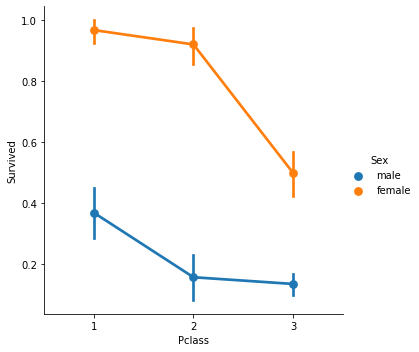

In [83]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=titanic_df)
plt.show()

### Appendix II. Age + Pclass

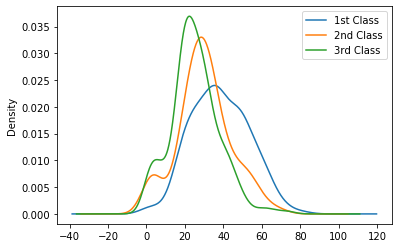

In [88]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')
plt.legend(['1st Class','2nd Class','3rd Class'])
plt.show()

#중심이 오른쪽으로 이동. 즉 클래스가 높아질 수록 나이대가 오른쪽으로 이동.

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### I. Fare(수치형)

In [95]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

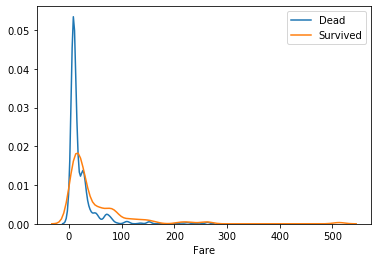

In [107]:
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['Fare'])
sns.kdeplot(titanic_df[titanic_df.Survived == 1]['Fare'])
plt.legend(['Dead','Survived'])
plt.xlabel('Fare')
plt.show()

- Fare(0~약30)의 경우 사망자가 생존자보다 훨씬 많음을 확인
- Fare(약30~100)의 경우 비슷하지만 생존자가 사망자보다 살짝 많음을 확인

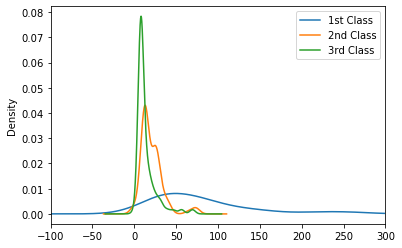

In [125]:
titanic_df['Fare'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st Class','2nd Class','3rd Class'])
plt.xlim(-100,300)
plt.show()

- Pclass가 높아질수록 금액이 상승하는 것을 확인

### II.SibSp(범주형)

In [127]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [139]:
titanic_df[['SibSp','Survived']].groupby(['SibSp']).sum()

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


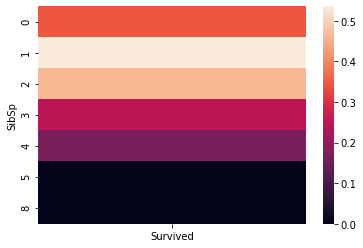

In [142]:
sns.heatmap(titanic_df[['SibSp','Survived']].groupby(['SibSp']).mean())
plt.show()

- 형제,자매가 1명있는 경우 생존자의 비율이 가장높다.
- 형제,자매가 2명있는 경우 생존자의 비율이 두번째로 높다.
- 형제,자매가 1명 또는 2명 있는 경우가 아예없는 경우보다 생존자의 비율이 더 높다
- 형제,자매가 3명이상인 경우, 형제,자매가 많을 수록 생존자의 비율이 낮다.

### III.Parch(범주형)

In [145]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [146]:
titanic_df[['Parch','Survived']].groupby(['Parch']).sum()

,Survived
Parch,
0,233
1,65
2,40
3,3
4,0
5,1
6,0


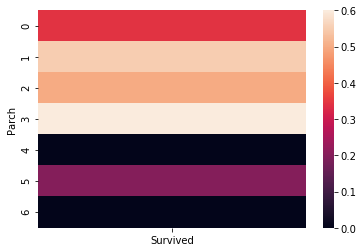

In [150]:
sns.heatmap(titanic_df[['Parch','Survived']].groupby(['Parch']).mean())
plt.show()

- 부모/자식이 3명인 경우 생존자의 비율이 가장 높다
- 부모/자식이 0명인 경우보다 1,2,3명인 경우의 생존자의 비율이 더 높다
- 부모자식이 4명이상인 경우 생존자의 비율이 매우낮다

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

- day4폴더에 저장